In [1]:
#Neural network with 1 hiden layer
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Genarate data for trainning  and show relationship in plot
* n: number data point for each class
* d: dimention for each data
* c: number class

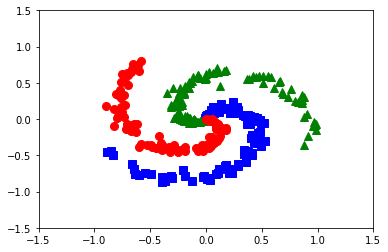

In [2]:
n=100
d=2
c=3

x=np.zeros((d,n*c))
y=np.zeros(n*c,dtype='uint8')
for i in range(c):
    index=range(n*i,n*(i+1))
    r=np.linspace(0.0,1,n) #radius
    t=np.linspace(4*i,4*(i+1),n)+0.2*np.random.randn(n) #create theta
    x[:,index]=np.c_[r*np.sin(t),r*np.cos(t)].T
    y[index]=i

#visualizatied data set
plt.plot(x[0,:n],x[1,:n],'bs',markersize=8)
plt.plot(x[0,n:2*n],x[1,n:2*n],'g^',markersize=8)
plt.plot(x[0,2*n:3*n],x[1,2*n:3*n],'ro',markersize=8)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.savefig('data_visual.png')
plt.show()



# Return probability for each class (can use logistic function)

In [3]:
def softmax_function(z):
    e_z=np.exp(z-np.max(z,axis=0,keepdims=True))
    return e_z/e_z.sum(axis=0)

# Cost function 

In [4]:
def cross_entropy(a2,Y):
    return -np.sum(Y*np.log(a2))/n

# Build the one-hot coding matrix 
Example: The class label is [0,1,2,3,2] so the below function return the below matrix
$$\begin{bmatrix} 1 & 0 & 0 & 0 & 0
                \\0 & 1 & 0 & 0 & 0
                \\0 & 0 & 1 & 0 & 1
                \\0 & 0 & 0 & 1 & 0
                \\0 & 0 & 0 & 0 & 0\end{bmatrix}$$

In [5]:

def convert_labels(y,c):
    return coo_matrix((np.ones_like(y),(y,np.arange(len(y)))),shape=(c,len(y))).toarray()

# Training model and update the weight matrix through gradient desent

In [6]:

def multi_layer_model(w1,b1,w2,b2,lr):
    loss_hist=[]
    Y=convert_labels(y,c)
    for epoch in range(10001): 
        # calculate Feedforward
        z1=w1.T.dot(x)+b1 #shape (d0,3n)
        #Rectified Linear Unit (ReLU function) is most common activation function for building the neural network
        #ReLU function: max(0,z)
        a1=np.maximum(z1,0)                   
        z2=w2.T.dot(a1)+b2
        a2=softmax_function(z2) 
        
        loss_value=cross_entropy(a2,Y)
        loss_hist.append(loss_value)
#         if epoch%1000==0:
#             print("Iteration: %d Loss value= %0.4f"%(epoch,loss_value))
            
    
        #now, we need calculate the part derivative, then update the weight matrix for w1,b1,w2,b2
        
        #backpropagation algorithms         
        e2=(a2-Y)/n
        del_w2=a1.dot(e2.T)
        del_b2=np.sum(e2,axis=1, keepdims=True)
        e1=w2.dot(e2)
        e1[z1<=0]=0 # in ReLU= max(z,0), so if z <0, the derivative of z =0
        del_w1=x.dot(e1.T)
        del_b1=np.sum(e1,axis=1,keepdims=True)
        
        #Gradient desent update
        w1+=-lr*del_w1
        b1+=-lr*del_b1
        w2+=-lr*del_w2
        b2+=-lr*del_b2
        
    return (w1,b1,w2,b2,loss_hist)


# Initialized the number unit of hiden layer

In [7]:
d0=2 #data dimention
d2=c=3 #number of class
learn_rate=0.5

In [8]:
def calculate_accuracy(d1):
    w1=np.random.rand(d0,d1) #shape(d0,d1)
    b1=np.zeros((d1,1))
    w2=np.random.rand(d1,d2)
    b2=np.zeros((d2,1))
    (w1_train,b1_train,w2_train,b2_train,loss_hist)=multi_layer_model(w1,b1,w2,b2,learn_rate)
    z1_train=w1_train.T.dot(x)+b1_train
    a1_train=np.maximum(z1_train,0)
    z2_train=w2_train.T.dot(a1_train)+b2_train
    y_pre=np.argmax(z2_train,axis=0)
    acc=np.mean(y_pre==y)
    return (acc,loss_hist,w1_train,b1_train,w2_train,b2_train)

# Show result through the differrent hiden unit 

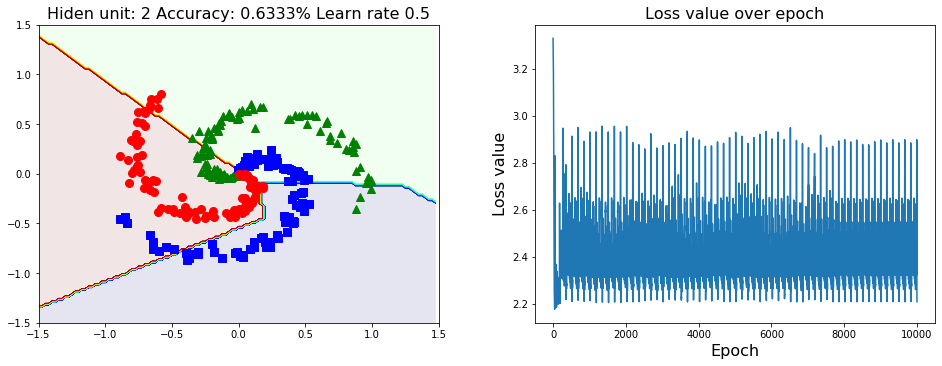

Time for excute the algorithms:2.1649959087371826 s


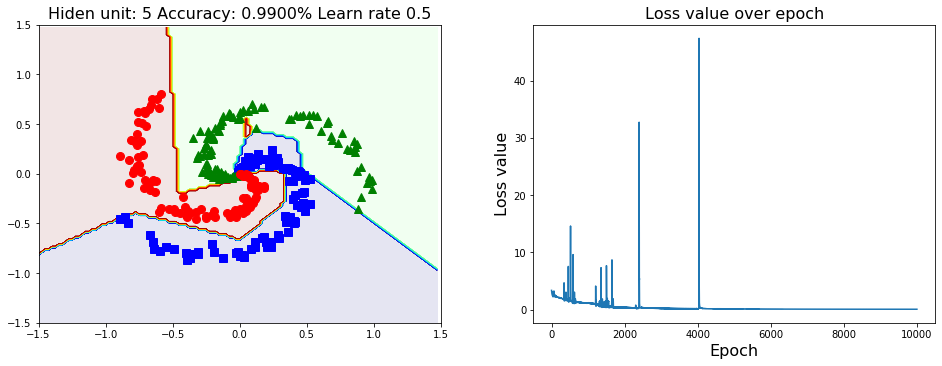

Time for excute the algorithms:2.390359401702881 s


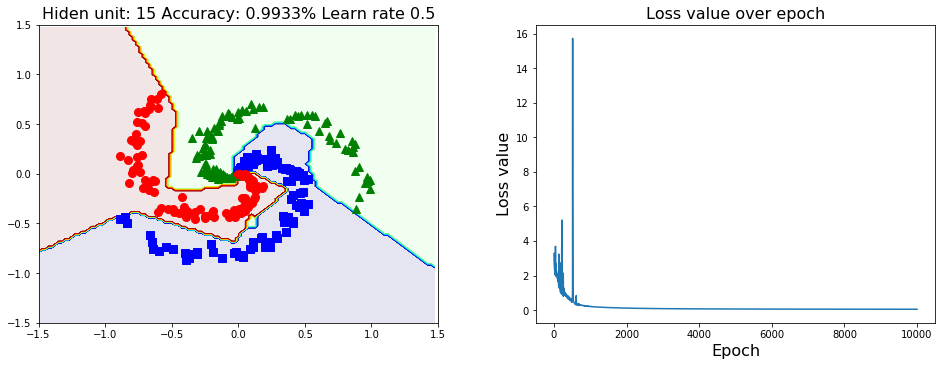

Time for excute the algorithms:2.805429220199585 s


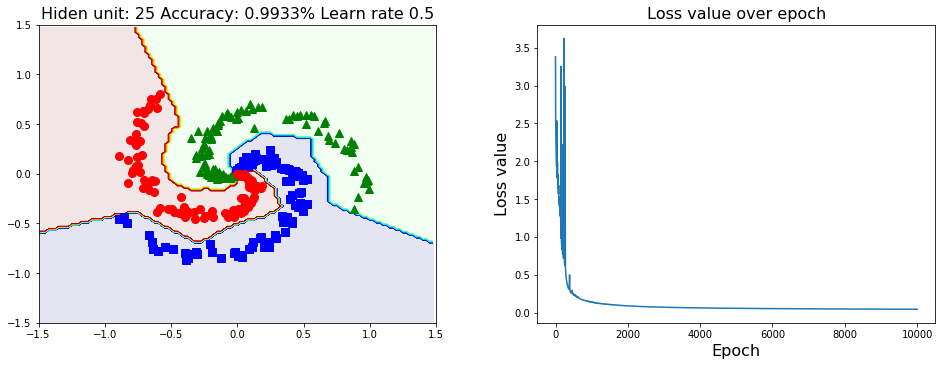

Time for excute the algorithms:3.243170738220215 s


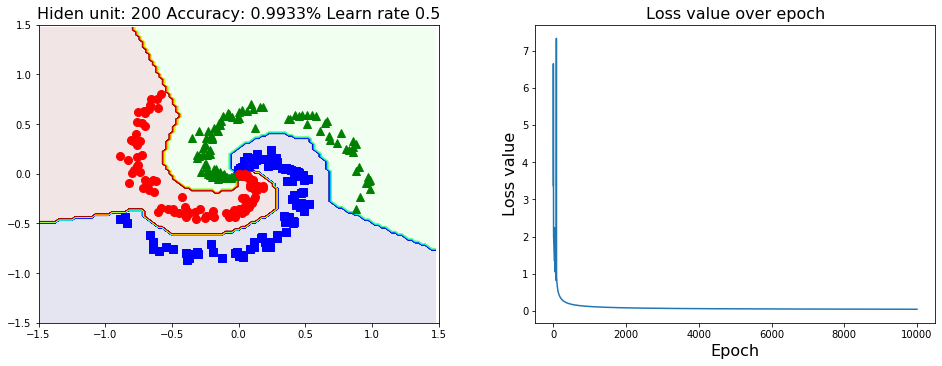

Time for excute the algorithms:10.45704436302185 s


In [11]:
import time 
hiden_unit_list=[2,5,15,25,200]

t1=time.time()
for hiden_unit in hiden_unit_list:
    (acc,loss_hist,w1_train,b1_train,w2_train,b2_train)=calculate_accuracy(hiden_unit)
    fig,(axs1,axs2)=plt.subplots(1,2,figsize=(14,6))
    
    #visualization 
        

    #visual the separate class
    x0=x1=np.arange(-1.5,1.5,0.025)
    xx,xx1=np.meshgrid(x0,x1)

    #array.ravel() means: convert the array with shape (n,m) into the array with shape (1,n*m)
    x_row1=xx.ravel().reshape(1,xx.size)
    x_row2=xx1.ravel().reshape(1,xx1.size)

    #data for draw the contour line 
    x_draw=np.vstack((x_row1,x_row2))

    z1_for_draw=w1_train.T.dot(x_draw)+b1_train
    a1=np.maximum(z1_for_draw,0)
    z2=w2_train.T.dot(a1)+b2_train

    #done for separate all data point in the graph
    #then we need draw the contoue line in the graph
    y_=np.argmax(z2,axis=0).reshape(xx.shape)
    contour_line=axs1.contourf(xx,xx1,y_,200,cmap='jet',alpha=0.1)

    axs1.plot(x[0,:n],x[1,:n],'bs',markersize=8)
    axs1.plot(x[0,n:2*n],x[1,n:2*n],'g^',markersize=8)
    axs1.plot(x[0,2*n:3*n],x[1,2*n:3*n],'ro',markersize=8)
    axs1.set_xlim([-1.5, 1.5])
    axs1.set_ylim([-1.5, 1.5])
    title="Hiden unit: {} Accuracy: {:.4f}% Learn rate {}".format(hiden_unit,acc,learn_rate)
    axs1.set_title(title,fontsize=16)
    
    #draw loss history 
    epoch=np.arange(0,10001)
    axs2.plot(epoch,loss_hist)
    axs2.set_xlabel("Epoch",fontsize=16)
    axs2.set_ylabel("Loss value",fontsize=16)
    axs2.set_title("Loss value over epoch",fontsize=16)    
    fig.tight_layout(pad=4.0)
    plt.show()
    t=time.time()
    print("Time for excute the algorithms:"+str(t-t1)+" s")
   # photo_name="Neural_with_{}_hiden_unit.png".format(hiden_unit)
    #plt.savefig('Neural_with_{}_hiden_unit.png'.format(hiden_unit))
    if hiden_unit==hiden_unit_list[-1]:
        fig.savefig("result.png")
    t1=t